In [1]:
!pip install -q tf-watcher

     |████████████████████████████████| 454.4 MB 9.7 kB/s 
     |████████████████████████████████| 1.9 MB 33.9 MB/s 
     |████████████████████████████████| 54 kB 2.9 MB/s 
     |████████████████████████████████| 454 kB 49.5 MB/s 
     |████████████████████████████████| 82 kB 1.1 MB/s 
     |████████████████████████████████| 3.2 MB 36.7 MB/s 
     |████████████████████████████████| 1.2 MB 38.3 MB/s 
     |████████████████████████████████| 4.0 MB 39.0 MB/s 
     |████████████████████████████████| 462 kB 50.7 MB/s 


In [9]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import tfwatcher
from tensorflow import keras
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [3]:
print(tf.__version__)

2.5.1


## Import the Fashion MNIST dataset

The [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>


In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
len(train_labels)

60000

In [10]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# Test Dataset

In [11]:
test_images.shape

(10000, 28, 28)

In [12]:
len(test_labels)

10000

## Preprocessing

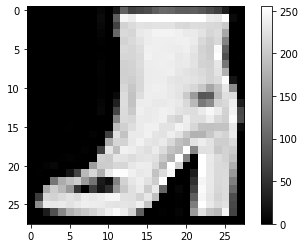

In [13]:
plt.figure()
plt.imshow(train_images[88], cmap="gray")
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Build & Compile the model


In [20]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10)
])

In [21]:
model.compile(optimizer='adam',
              loss= SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
MonitorCallback = tfwatcher.callbacks.EpochEnd(schedule = 1)

Use this ID to monitor training for this session: GkEeRke


# Open https://www.tfwatcher.tech

In [22]:
history = model.fit(train_images, 
                    train_labels, 
                    validation_split = 0.5,
                    callbacks = [MonitorCallback],
                    epochs = 20)

Epoch 1/20
938/938 [==============================] - 4s 4ms/step - loss: 0.5571 - accuracy: 0.8059 - val_loss: 0.4720 - val_accuracy: 0.8361
Epoch 2/20
938/938 [==============================] - 3s 3ms/step - loss: 0.4205 - accuracy: 0.8499 - val_loss: 0.3923 - val_accuracy: 0.8603
Epoch 3/20
938/938 [==============================] - 3s 3ms/step - loss: 0.3661 - accuracy: 0.8672 - val_loss: 0.3772 - val_accuracy: 0.8689
Epoch 4/20
938/938 [==============================] - 3s 3ms/step - loss: 0.3410 - accuracy: 0.8752 - val_loss: 0.3737 - val_accuracy: 0.8689
Epoch 5/20
938/938 [==============================] - 3s 3ms/step - loss: 0.3182 - accuracy: 0.8814 - val_loss: 0.3499 - val_accuracy: 0.8757
Epoch 6/20
938/938 [==============================] - 3s 3ms/step - loss: 0.3001 - accuracy: 0.8881 - val_loss: 0.3567 - val_accuracy: 0.8755
Epoch 7/20
938/938 [==============================] - 3s 3ms/step - loss: 0.2865 - accuracy: 0.8932 - val_loss: 0.3326 - val_accuracy: 0.8823
Epoch 